# Aprendizado de maquina(machine learning)
- Aprendizado Supervisionado 
    - Neste tipo de aprendizado, o algoritmo é treinado usando um conjunto de dados eotulados, ou seja, dados que já possuem a resposta correta. O objetivo é aprender a mapear a entrada para a saída correta.
    - __Classificação:__ O objetivo é prever uma categoria ou classe. Exemplo incluem classificação de emails como spam ou não-spam, diagnostico de doençãs ou etc
    - __Regressão__: O objetivo é prever um valor continuo. Exemplos incluem previsão de preços de imoveis, temperaturas etc..

- Aprendizado Semi-Supervisionado
    - Este tipo de aprendizado usa uma combinação de dados rotulados e não rotulados para treinar o modelo. É util quando rotular dados é caro ou demrado, mas é possivel obter muitos dados não rotulados

- Aprendizado Não Supervisionado
    - Neste caso, os dados não são rotulados, e o objetivo é encontrar padro~es ou estruturas ocultas nos dados
    - __Agrupamento(Clustering)__: O objetivo é agrupar dados semelhantes em clusters. Exemplos incluem segmentações de clientes, analise de grupo de gene, etc...
    - __Redução de Dimensionalidade:__ O objetivo é reduzir o numero de variaveis em um conjunto de dados

- Aprendizagem por reforço 
    - O algoritmo aprende a tomar decisões atraves de tentativa e erro, recebendo recompensas ou punições com base nas ações realizadas. O objetivo é maximizar a recompensa acumulada ao longo do tempo
    - __Agentes de aprendizagem__: Exemplos incluem robos aprendendo a andar ou algoritmo jogando xadrez

- Aprendizado Profundo (Deep Learning)

    -É um subcampo do aprendizado de máquina que usa redes neurais profundas (com muitas camadas) para modelar dados complexos. É particularmente eficaz em tarefas como reconhecimento de imagem, processamento de linguagem natural, e jogos.


# K-means 
é um algoritmo de aprendizado não supervisionado usado para resolver problemas de agrupamento(clustering)

- Conceito basico
    - O K-means é um algoritmo de agrupamento que particiona um conjunto de n observações em k clusters, onde cada observação pertence ao cluster com o centroide mais proximo. Um centoide é o ponto medio de um cluster

- Funcionamento do algoritmo
    - Define um numero de clusters K
    - Inicialização dos centoides: Inicialmente selecione K pontos aleatorios como centoides iniciais, esses pontos podem ser observações aleatoria dos dados ou escolhido de outra maneira
    - Atribuição de clusters: Para cada observação no conjunto de dados, calcule a distancia entre a observação e cada um dos K cenoides. Atribua cada observação ao cluster cujo centroide esteja mais proxmo
    - Atualização dos centroides: Para cada um dos K nos clusters, calcule o novo centroide tomando a media de todasd as observações atribuidas a esse cluster
    - Repetição: Repita os passos de atribuição e atualização até que os centroides não mudem mais significativamente, ou seja, até que as observações estejam atribuidas de maneira estavel aos cluester. Isso significa que a solução convergiu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
colunms_name = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]

In [4]:
df_iris = pd.read_csv(url,header=None,names=colunms_name)

In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


__Separando os valores de dados e classes__

In [6]:
X = df_iris.drop('Species',axis=1)
X[:10]
y = df_iris.Species
y.unique()# Remover a coluna 'Species' para X e manter como y

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
y = df_iris.Species
y.unique()# Remover a coluna 'Species' para X e manter como y

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

__Convertendo valores categoricos de classe em numericos__

In [8]:
def convert_classe(l):
    if l == 'Iris-setosa':
        return 0
    if l == 'Iris-versicolor':
        return 1
    if l == 'Iris-virginica':
        return 2

In [9]:
y = y.apply(convert_classe)
y.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

__Instanciando o Algoritmo K-means com 3 clusters__

In [10]:
kmeans = KMeans(n_clusters=3,init='random')

In [11]:
kmeans.fit(X)

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

__Centroids__

In [12]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

__tabela de distancia__

In [13]:
distance = kmeans.fit_transform(X)
distance

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [14]:
distance [0]

array([0.14694217, 5.0595416 , 3.41925061])

__visualizando valores de distancia para cada cluster__

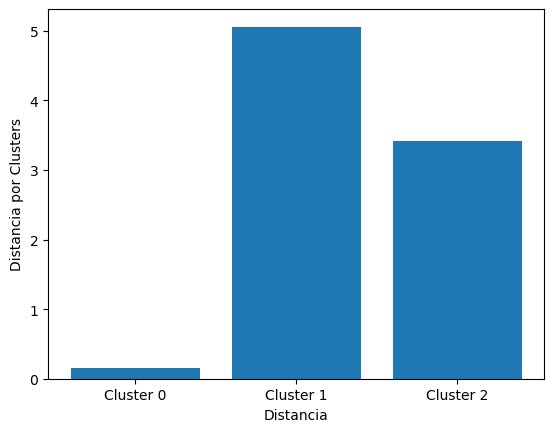

In [19]:
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.bar(x,distance[0])
plt.xlabel('Distancia')
plt.ylabel('Distancia por Clusters')
plt.show()

In [20]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

__Vizualização dos centroids__

<function matplotlib.pyplot.show(close=None, block=None)>

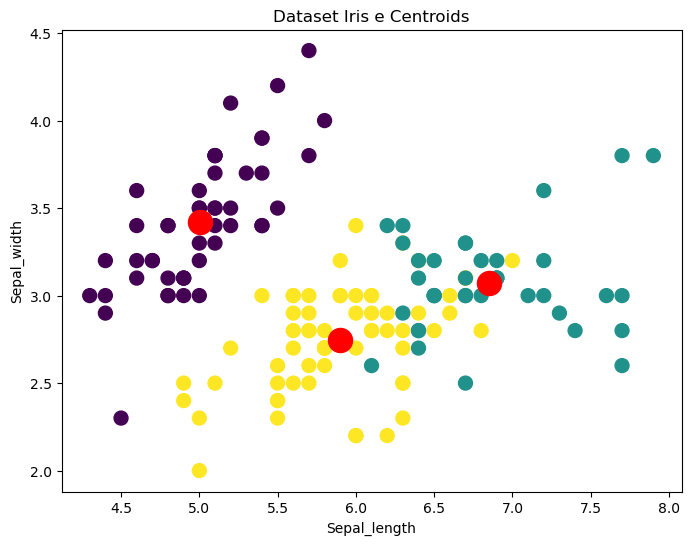

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X['sepal_length'], X['sepal_width'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.show
# Os centroids são as bolas em vermelho

__Agrupando novos dados__

In [24]:
data = [
    [4.12,3.4,1.6,0.7],
    [5.2,5.8,5.2,6.7],
    [3.1,3.5,3.3,3.0]
]
kmeans.predict(data)

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1, 2])

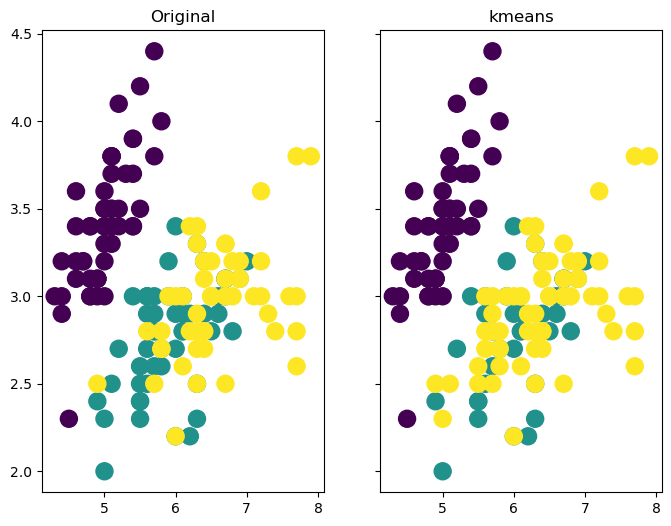

In [28]:
f,(ax1,ax2) = plt.subplots(1,2, sharey = True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['sepal_length'],X['sepal_width'],s=150,c=sorted(y))
ax2.set_title('kmeans')
ax2.scatter(X['sepal_length'],X['sepal_width'],s=150,c=sorted(kmeans.labels_))

# Estimando o valor do parametro K - método Elbow

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 680.8244


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 152.36870647733906


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 78.94084142614601


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 57.31787321428571


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 46.535582051282056


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 38.93873974358974


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 34.32508172302738


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 30.367198747307448


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 28.252703463203467


c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 27.344532129663712


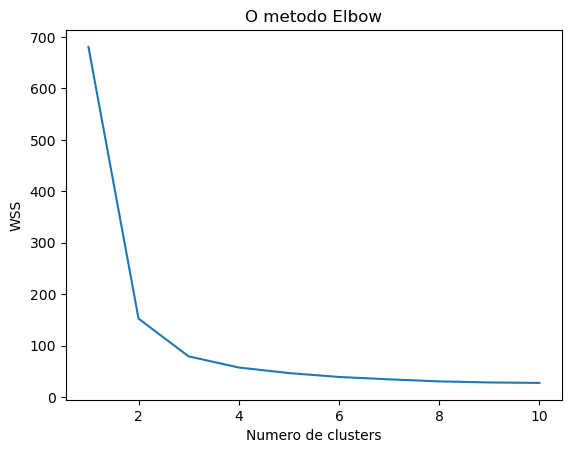

In [29]:
wcss = []

for i in range (1,11):
    kmeans2 = KMeans(n_clusters=i, init='random')
    kmeans2.fit(X)
    print(i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
plt.plot(range(1,11),wcss)
plt.title('O metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') # within cluster sum off square
plt.show()

O Metodo Elbow serve para ter uma estimativa previa do valor ideal de K

# Tecnicas de validação
__Matriz de Confusão__

In [30]:
print(pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        50   0   0   50
1         0   2  48   50
2         0  36  14   50
All      50  38  62  150


__Metricas de classificação__

In [31]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_, target_names=clusters))


              precision    recall  f1-score   support

   Cluster 2       1.00      1.00      1.00        50
   Cluster 1       0.05      0.04      0.05        50
   Cluster 0       0.23      0.28      0.25        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150

